In [1]:
#importing required modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def my_plot(x, y):
    freq_series = pd.Series.from_array(y)  
    x_labels = x

    plt.figure(figsize=(20,10))
    ax = freq_series.plot(kind='bar')
    ax.set_title("Lucky Frequency")
    ax.set_xlabel("Number ")
    ax.set_ylabel("Winning Number Frequency")
    ax.set_xticklabels(x_labels)

    rects = ax.patches

    for rect in rects:
        ax.text(rect.get_x() + rect.get_width(), 
                rect.get_height(), 
                int(rect.get_height()), 
                ha='center', 
                va='bottom')

In [3]:
#creating column names
#loading csv file into a dataframe and assigning columns names as well
tbl_cols = ['draw_dt', 'first_num', 'second_num', 'third_num', 'fourth_num', 'fifth_num', 'mega_ball']
mm_tbl = pd.read_csv('winning_numbers_by_date_pd.txt',  header=None, names=tbl_cols, parse_dates=['draw_dt'])

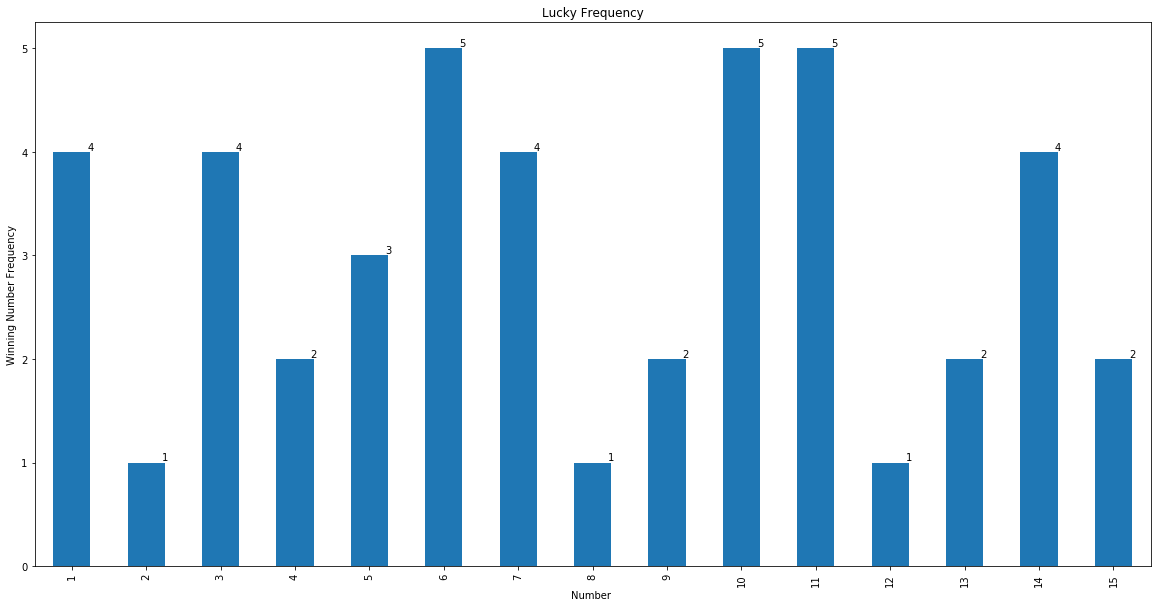

In [4]:
s = set()
m = set(range(1,16))
for index, row in mm_tbl.sort_values('draw_dt', ascending=False).iterrows():
    s.add(row['mega_ball'])
    if (m - s) == set():
        dt =row['draw_dt']
        break
        
freq_tble = mm_tbl[mm_tbl['draw_dt'] >= dt]['mega_ball'].value_counts()
for i in range(1,16):
    if freq_tble.get(i) == None:
        freq_tble[i] = 0
x = freq_tble.sort_index().index
y = freq_tble.sort_index().values
my_plot(x, y)
plt.show()